This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [302]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: 3156c31b-a589-11ed-beee-90e8686fed6c


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
import os
import random
from PIL import Image
import cv2 as cv
import pandas as pd
from scipy.stats import kurtosis,skew,entropy
from statistics import mean,variance



In [32]:
def contour_finder(img):
    out = []
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find Canny edges
    edged = cv.Canny(gray, 160, 200)
    cv.waitKey(0)
    contours, hierarchy = cv.findContours(edged,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    out.append(contours)
    out.append(hierarchy)
    cv.drawContours(img, contours, -1, (0, 255, 0),2)
    out.append(img)
    return (out)

In [33]:
path_1 = '/MachLearning_&Pattern_recog/data/Arborio'
path_2 = '/MachLearning_&Pattern_recog/data/Basmati'
path_3 = '/MachLearning_&Pattern_recog/data/Jasmine'
paths = [path_1,path_2,path_3]


            


In [34]:


image_list=[]
contoured_images = []
contours_list = []
ellipses = []
major_axis = []
minor_axis = []
areas = []
perimeters = []
roundness = []
aspect_ratio = []
mean_r = []
mean_g = []
mean_b = []
var_r = []
var_g = []
var_b = []
skew_r = []
skew_g = []
skew_b = []
kurt_r = []
kurt_g = []
kurt_b = []
ent_r = []
ent_g = []
ent_b = []
for x, value in enumerate(paths):
    names = random.choices(os.listdir(value), k=100) #----> Randomly select 100 images
    for i, filename in enumerate(names): 
        full_path = os.path.join(value, filename)
        if os.path.isfile(full_path):
            img = cv.imread(full_path)
            image_list.append(img)

for i,image in enumerate(image_list):   
    contoured_images.append(contour_finder(image))
    contours = contoured_images[i][0]
    ellipses.append(cv.fitEllipse(contours[0]))
    major_axis.append(ellipses[i][1][1])
    minor_axis.append(ellipses[i][1][0])
    areas.append(cv.contourArea(contours[0]))
    perimeters.append(cv.arcLength(contours[0], True))
    roundness.append(np.round((4*areas[i]*np.pi/(perimeters[i]+0.00001)**2),2))
    aspect_ratio.append(np.round((major_axis[i]/minor_axis[i]),2))
    r = []
    g = []
    b = []
    for i in range((image.shape[0])):
        for j in range((image.shape[1])):
            if cv.pointPolygonTest(contours[0], (i,j), False) > 0:
                r.append(image[i,j,0])
                g.append(image[i,j,1])
                b.append(image[i,j,2])
    # print(len(r))
    mean_r.append(mean(r))
    mean_g.append(mean(g))
    mean_b.append(mean(b))
    var_r.append(variance(r))
    var_g.append(variance(g))
    var_b.append(variance(b))
    skew_r.append(skew(r))
    skew_g.append(skew(g))
    skew_b.append(skew(b))
    kurt_r.append(kurtosis(r))
    kurt_g.append(kurtosis(g))
    kurt_b.append(kurtosis(b))
    ent_r.append(entropy(r))
    ent_g.append(entropy(g))
    ent_b.append(entropy(b))
            




c:\Users\vasis\AppData\Local\Programs\Python\Python310\lib\statistics.py:714: RuntimeWarning: overflow encountered in scalar multiply
  partials[diff_d * diff_d] += diff_n * diff_n
c:\Users\vasis\AppData\Local\Programs\Python\Python310\lib\statistics.py:714: RuntimeWarning: overflow encountered in scalar add
  partials[diff_d * diff_d] += diff_n * diff_n


In [35]:
# print(mean_r)
# print(r)

In [36]:
print(len(mean_r))

300


In [37]:
# # io.imshow(image_list[200])
# import numpy as np
# image = image_list[3]
# r = []
# g = []
# b = []
# for i in range((image.shape[0])):
#     for j in range((image.shape[1])):
#         # if cv.pointPolygonTest(contours[0], (i,j), False) > 0:
#             r.append(image[i,j,0])
#             g.append(image[i,j,1])
#             b.append(image[i,j,2])
# print(len(r))
# print(mean(r))

In [38]:
# image = image_list[3]
# r = []
# g = []
# b = []
# for i, value in enumerate(image):
#     for j, value in enumerate(image[i]):
#         # if cv.pointPolygonTest(contours[0], (i,j), False) > 0:
#             r.append(image[i][j][0])
#             g.append(image[i][j][1])
#             b.append(image[i][j][2])
# print(len(r))
# print(mean(r))
# print(np.mean(r))

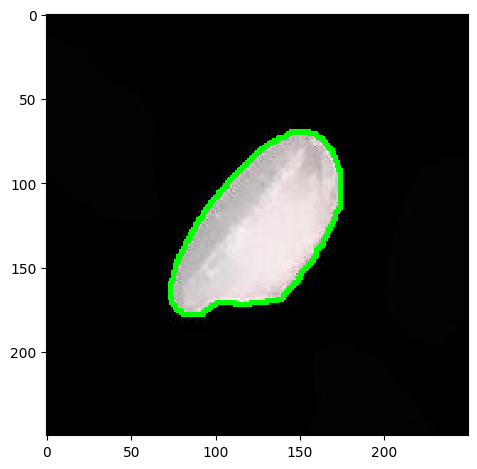

In [39]:
io.imshow(image_list[99])
# print(image_list[99])

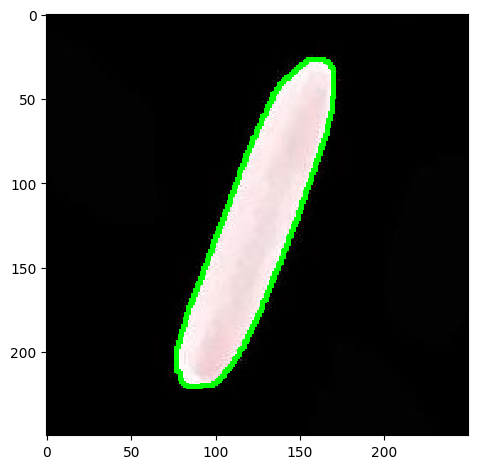

In [40]:
# title = 'Basmati with Contours'
io.imshow(image_list[100])

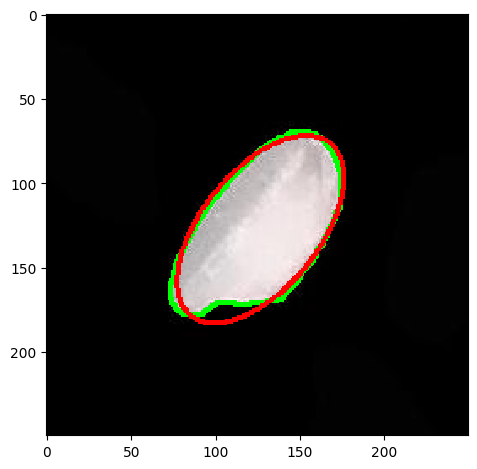

In [41]:


io.imshow(cv.ellipse(image_list[99],ellipses[99],(255,0,0),2))

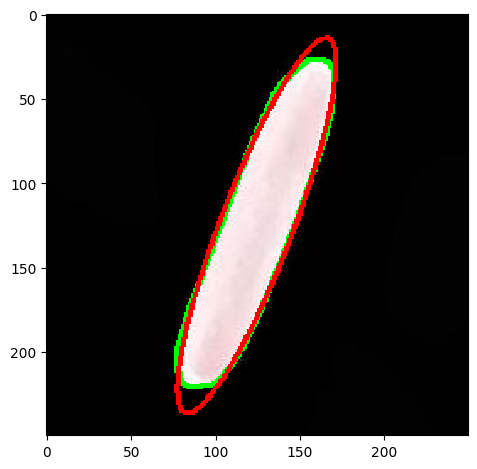

In [42]:
io.imshow(cv.ellipse(image_list[100],ellipses[100],(255,0,0),2))

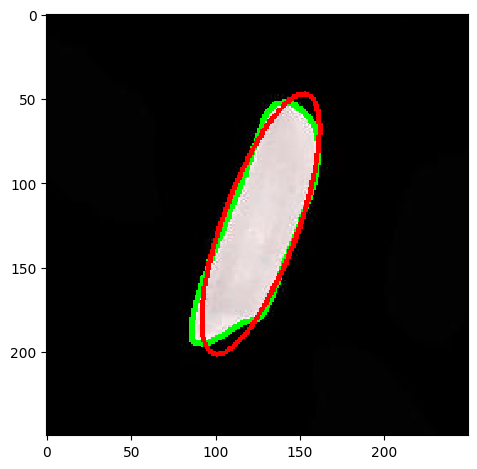

In [43]:
io.imshow(cv.ellipse(image_list[200],ellipses[200],(255,0,0),2))

In [75]:
print(mean_r)
print(mean_g[0])
print(mean_b[0])
print(minor_axis[0])
print(var_g)


[146, 130, 183, 141, 164, 149, 163, 147, 209, 181, 180, 176, 188, 189, 122, 188, 167, 178, 135, 183, 152, 138, 193, 130, 178, 109, 139, 159, 147, 123, 144, 126, 180, 169, 154, 171, 119, 152, 149, 130, 128, 191, 123, 120, 162, 120, 182, 132, 137, 144, 167, 118, 146, 148, 124, 163, 135, 162, 177, 163, 160, 136, 140, 154, 153, 197, 119, 136, 144, 130, 158, 187, 139, 145, 116, 179, 148, 136, 194, 114, 154, 163, 123, 116, 181, 138, 174, 123, 170, 141, 204, 130, 193, 181, 123, 150, 172, 115, 134, 192, 66, 68, 100, 62, 63, 143, 92, 134, 69, 187, 127, 136, 98, 67, 83, 84, 94, 61, 62, 165, 73, 65, 47, 81, 61, 134, 73, 60, 91, 205, 103, 53, 70, 131, 123, 102, 72, 65, 71, 214, 64, 62, 53, 104, 54, 55, 111, 61, 201, 203, 58, 191, 58, 109, 81, 78, 127, 62, 112, 131, 58, 70, 118, 62, 68, 76, 129, 71, 73, 128, 124, 159, 62, 166, 123, 61, 59, 77, 66, 93, 112, 71, 149, 81, 82, 106, 63, 48, 78, 71, 81, 142, 84, 177, 124, 60, 62, 204, 60, 73, 88, 166, 99, 81, 136, 121, 74, 64, 72, 82, 159, 76, 81, 184, 8

In [74]:
d = {'minor_axis':minor_axis, 'major_axis':major_axis,
'area':areas, 'perimeter':perimeters, 
'roundness':roundness, 'aspect_ratio':aspect_ratio, 
'mean_red':mean_r,'mean_green': mean_g, 'mean_blue':mean_b, 
'variance_red': var_r,'variance_green':var_g, 'variance_blue':var_b, 
'skewness_red':skew_r, 'skewness_green':skew_g, 'skewness_blue':skew_b, 
'kurtosis_red':kurt_r, 'kurtosis_green':kurt_g,'kurtosis_blue':kurt_b, 
'entropy_red':ent_r, 'entropy_green':ent_g, 'entropy_blue':ent_b }

training_dataframe = pd.DataFrame.from_dict(d)
# print(pd.DataFrame(d, columns=['minor_axis', 'major_axis',
# 'area', 'perimeter', 
# 'roundness', 'aspect_ratio', 
# 'mean_red','mean_green', 'mean_blue', 
# 'variance_red','variance_green', 'variance_blue', 
# 'skewness_red', 'skewness_green', 'skewness_blue', 
# 'kurtosis_red', 'kurtosis_green','kurtosis_blue', 
# 'entropy_red', 'entropy_green', 'entropy_blue']))

print(pd.DataFrame(d, columns=d.keys()))

     minor_axis  major_axis    area   perimeter  roundness  aspect_ratio  \
0     78.594078  145.580841  8725.5  397.806129       0.69          1.85   
1     63.836346  131.916992  6454.5  343.663994       0.69          2.07   
2     70.846260  134.553360  7418.0  357.362478       0.73          1.90   
3     74.450287  138.274734  8004.0  368.735062       0.74          1.86   
4     69.130966  126.212326  6610.5  331.948267       0.75          1.83   
..          ...         ...     ...         ...        ...           ...   
295   65.336975  197.160217  9842.5  465.203099       0.57          3.02   
296   48.083118  152.087479  5577.5  353.605120       0.56          3.16   
297   50.464069  173.982391  6105.0  362.274167       0.58          3.45   
298   49.286163  138.457092  5225.5  321.404107       0.64          2.81   
299   49.637257  144.922043  5348.5  328.894442       0.62          2.92   

     mean_red  mean_green  mean_blue  variance_red  ...  variance_blue  \
0        -110

In [71]:
training_dataframe.head()

,minor_axis,major_axis,area,perimeter,roundness,aspect_ratio,mean_red,mean_green,mean_blue,variance_red,...,variance_blue,skewness_red,skewness_green,skewness_blue,kurtosis_red,kurtosis_green,kurtosis_blue,entropy_red,entropy_green,entropy_blue
0,78.594078,145.580841,8725.5,397.806129,0.69,1.85,-110,-99,-113,0,...,0,-0.413878,-0.646731,-0.410636,-1.811164,-1.552551,-1.810622,8.559881,8.640199,8.555012
1,63.836346,131.916992,6454.5,343.663994,0.69,2.07,-126,-111,-127,0,...,0,-0.308361,-0.571572,-0.307560,-1.876596,-1.614041,-1.876589,8.217126,8.318161,8.214368
2,70.846260,134.553360,7418.0,357.362478,0.73,1.90,-73,-59,-78,0,...,1,-1.532828,-2.190790,-1.524355,0.413291,3.097895,0.398464,8.685556,8.767003,8.683329
3,74.450287,138.274734,8004.0,368.735062,0.74,1.86,-115,-104,-119,0,...,0,-0.465105,-0.700970,-0.464076,-1.738257,-1.433374,-1.738300,8.500653,8.582584,8.497620
4,69.130966,126.212326,6610.5,331.948267,0.75,1.83,-92,-79,-97,0,...,0,-1.201944,-1.651126,-1.196811,-0.480608,1.048933,-0.486358,8.513578,8.598729,8.510730


In [48]:
training_dataframe.to_csv('C:/MachLearning_&Pattern_recog/training_data/training_data.csv')


In [ ]:
dataframe['mean_red'][1]

-79